# Lab activity 2: From Histograms to Gaussians

The goal of this activity is to help you conceptualize the connections among counts (histograms), probability mass functions, and probability density functions;
to see a model estimated from data; 
and to hint at some ideas that we will revisit with a future topic.

This activity notebook turned out a little more passive than I intended---on the surface,
it merely asks you to run some code rather than figure something out yourself. 
But to make this active, you should

* Inspect the code, especially to understand how the libraries are being called.
* Lookup documentation on the library calls to see what the options means.
* Tryout your own variations on the code.
* Improve the code (and let me know if you have a major improvement)

## 1. A simple histogram

Grab the blueberry-pancake data that we saw in class on Friday, and look at it.

In [93]:
import numpy as np
blueberries = np.loadtxt("data/blueberries")

In [94]:
blueberries

array([ 4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,
        8.,  8.,  9.,  9., 10., 10., 11.])

Now let's make a histogram out of that using numpy's histogram function. Actually, we want this to be a normalized histogram, essentially a probability mass function. 
The histogram function has a <i>density</i> option, which if set to true makes this histogram like a probability density function. To make it a probability <i>mass</i> function, we also need to make sure that the bins have width 1, so we set the boundaries of the bins explicitly.

In [95]:
bb_norm_hist = np.histogram(blueberries, bins=[4,5,6,7,8,9,10,11,12], density=True)
bb_norm_hist

(array([0.1 , 0.15, 0.25, 0.15, 0.1 , 0.1 , 0.1 , 0.05]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]))

Check that this is indeed a probability mass function, that the bins' probabilities sum to one. 

In [96]:
sum(bb_norm_hist[0])

1.0

Notice that the x values are in row 1, y in row 0. In fact, row 1 has the bin boundaries, so it has one one entry than there are bins; consequently we ignore that last entry when we interpret row 1 as the x values.

In [97]:
bb_norm_hist[1][:-1]

array([ 4,  5,  6,  7,  8,  9, 10, 11])

In [98]:
bb_norm_hist[0]
sum(bb_norm_hist[0][:-1])

0.95

Let's see what that histogram looks like.

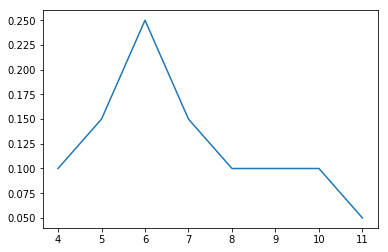

In [99]:
import matplotlib.pyplot as plt
plt.plot(bb_norm_hist[1][:-1], bb_norm_hist[0])
plt.show()

Does it look normally distributed to you?

# 2. Fitting a Gaussian

Recall that the parameters to the Gaussian distribution are the mean and the variance (or standard deviation, whicih is the square root of the variance).
Also recall that computing the maximum likelihood Gaussian from data is easy:
just compute the mean and standard deviation directly from their definitions.
It's even easier if you have library functions to do that for you.

In [104]:
mu = np.mean(blueberries)

In [105]:
sigma = np.sqrt(np.var(blueberries))

Let's plot the Gaussian probability density function for this data. The functino scipy.stats.norm.pdf acts as that probability density function with x (the value at which
to compute a probability density) and mu and sigma are parameters.

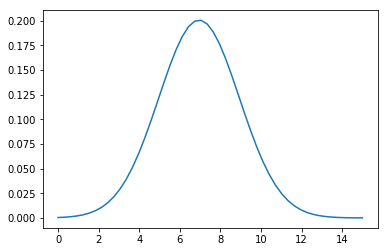

In [118]:
from scipy.stats import norm
range = np.linspace(0, 15)
plt.plot(range, norm.pdf(range, mu, sigma))
plt.show()

But does that fit our data? Does it support our hypothesis of normal distribution of blueberries? Let's plot them both together.

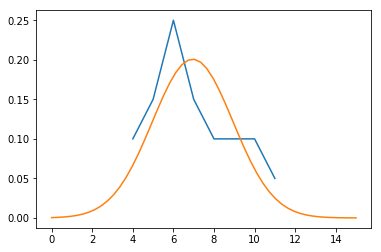

In [119]:
plt.plot(bb_norm_hist[1][:-1], bb_norm_hist[0])
plt.plot(range, norm.pdf(range, mu, sigma))
plt.show()

It's not too far off. What do you think?

# 3. More data

Let's try a similar experiment with more (and professionally managed) data.
In the data folder is a file containing a dataset from Kaggle about weight and height
information for 10000 individuals. [Here's where I got it from.](https://www.kaggle.com/mustafaali96/weight-height).

This time we'll read it in as a Pandas dataframe. Then take a look at it.

In [120]:
import pandas as pd

heightweight = pd.read_csv("data/weight-height.csv")

In [121]:
heightweight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


Looking at height in particular...

In [122]:
heightweight["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
5       67.253016
6       68.785081
7       68.348516
8       67.018950
9       63.456494
10      71.195382
11      71.640805
12      64.766329
13      69.283070
14      69.243732
15      67.645620
16      72.418317
17      63.974326
18      69.640060
19      67.936005
20      67.915050
21      69.439440
22      66.149132
23      75.205974
24      67.893196
25      68.144033
26      69.089631
27      72.800844
28      67.421242
29      68.496415
          ...    
9970    65.618737
9971    64.640247
9972    60.653733
9973    60.737031
9974    65.393947
9975    66.251923
9976    61.475904
9977    64.494838
9978    57.375759
9979    62.056012
9980    60.472262
9981    60.443264
9982    69.868511
9983    65.830726
9984    59.047029
9985    68.041065
9986    63.352698
9987    65.610243
9988    59.538729
9989    60.955084
9990    63.179498
9991    62.636675
9992    62.077832
9993    60.030434
9994    59

In [123]:
min(heightweight["Height"])

54.2631333250971

In [124]:
max(heightweight["Height"])

78.99874234638959

Let's see what its (normalized) histogram looks like. This time we won't force the bins to have width 1, so this is a probability density function, not a probability mass function.

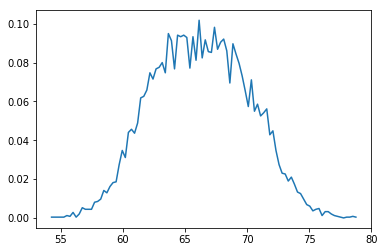

In [125]:
wh_norm_hist = np.histogram(heightweight["Height"], bins=100,density=True)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.show()

It looks somewhat Gaussian, but we'll get a sharper image with more bins.

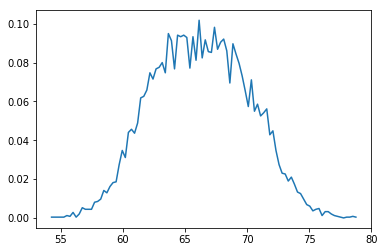

In [126]:
wh_norm_hist = np.histogram(heightweight["Height"], bins=100,density=True)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.show()

Looks a little spikey. But let's see how well a Gaussian fits to it.

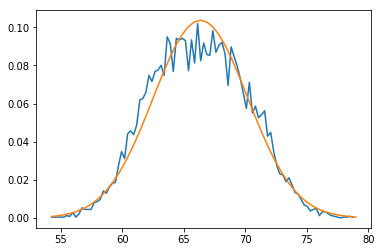

In [127]:
mu = np.mean(heightweight["Height"])
sigma = np.sqrt(np.var(heightweight["Height"]))
range = np.linspace(min(heightweight["Height"]), max(heightweight["Height"]))
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(range, norm.pdf(range, mu, sigma))
plt.show()

Not bad, but not great. There are noticable places where the Gaussian estimation and the histogram are off.

# 3. When two Gaussians are better than one

Our assumption that human height is normally distributed didn't use a bit of prior knowledged: height is distributed differently for males and females. Our dataset in fact lets us differentiate, since it contains a gender attribute. Looking only at male height, for example: 

In [60]:
heightweight[heightweight.Gender=="Male"]["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
5       67.253016
6       68.785081
7       68.348516
8       67.018950
9       63.456494
10      71.195382
11      71.640805
12      64.766329
13      69.283070
14      69.243732
15      67.645620
16      72.418317
17      63.974326
18      69.640060
19      67.936005
20      67.915050
21      69.439440
22      66.149132
23      75.205974
24      67.893196
25      68.144033
26      69.089631
27      72.800844
28      67.421242
29      68.496415
          ...    
4970    68.912831
4971    65.418334
4972    70.437177
4973    71.268931
4974    68.359811
4975    73.339590
4976    72.300190
4977    74.043290
4978    68.302839
4979    65.142314
4980    60.614115
4981    68.974481
4982    69.484563
4983    65.001413
4984    70.213375
4985    64.992892
4986    71.644419
4987    72.616816
4988    71.046562
4989    72.726342
4990    69.119831
4991    68.973942
4992    71.530978
4993    65.327337
4994    73

Now let's make separate histograms for the male and females in the data set.

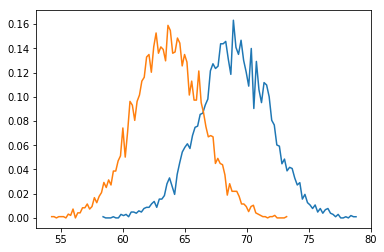

In [128]:
male_height = np.histogram(heightweight[heightweight.Gender=="Male"]["Height"], bins=100,density=True)
female_height = np.histogram(heightweight[heightweight.Gender=="Female"]["Height"], bins=100,density=True)
plt.plot(male_height[1][:-1], male_height[0])
plt.plot(female_height[1][:-1], female_height[0])
plt.show()

Not only are there clearly distinct distributions, but they <i>each</i> look Gaussian.
Let's try to fit a Gaussian just to the male data.

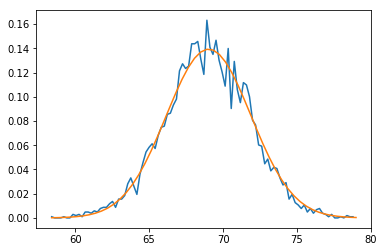

In [129]:
male_heights = heightweight[heightweight.Gender=="Male"]["Height"]
male_mu = np.mean(male_heights)
male_sigma = np.sqrt(np.var(male_heights))
range = np.linspace(min(male_heights), max(male_heights))
plt.plot(male_height[1][:-1], male_height[0])
plt.plot(range, norm.pdf(range, male_mu, male_sigma))
plt.show()

It seems what we really need is a <i>mixture of Gaussians</i>. The function human_height below acts like a probability density function on x. It is the linear combination of two Gaussian distributions combined under the assumption that a random individual has at 50/50 chance of being male or female.

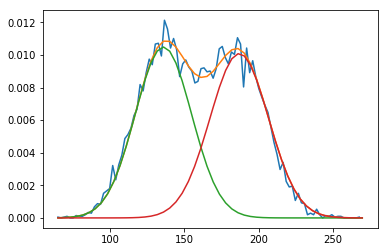

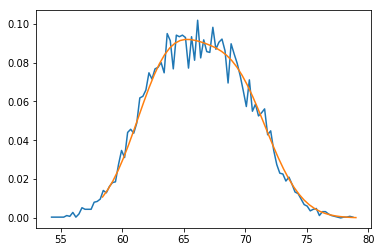

In [140]:


male_weights = heightweight[heightweight.Gender=="Male"]["Weight"]
male_mu2 = np.mean(male_weights)
male_sigma2 = np.sqrt(np.var(male_weights))

female_weights = heightweight[heightweight.Gender=="Female"]["Weight"]
female_mu2 = np.mean(female_weights)
female_sigma2 = np.sqrt(np.var(female_weights))
def human_weight(x) :
    return .5 * norm.pdf(x, male_mu2, male_sigma2) + .5 * norm.pdf(x, female_mu2, female_sigma2)
def m_weight(x) :
    return norm.pdf(x, male_mu2, male_sigma2) * .5
def f_weight(x) :
    return norm.pdf(x, female_mu2, female_sigma2) * .5
plt.plot(wh_norm_hist2[1][:-1], wh_norm_hist2[0])
wh_norm_hist2 = np.histogram(heightweight["Weight"], bins=100,density=True)
range2 = np.linspace(min(female_weights), max(male_weights))
plt.plot(range2, human_weight(range2))
plt.plot(range2, f_weight(range2))
plt.plot(range2, m_weight(range2))
plt.show()

female_heights = heightweight[heightweight.Gender=="Female"]["Height"]
female_mu = np.mean(female_heights)
female_sigma = np.sqrt(np.var(female_heights))
def human_height(x) :
    return .5 * norm.pdf(x, male_mu, male_sigma) + .5 * norm.pdf(x, female_mu, female_sigma)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(range, human_height(range))
plt.show()

Now that hits it. One important factor here was that we knew which data points were male and which were female, so we could choose which ones to use to calculate the male mu and sigma and which for the female. But what if we had only the height data, not tagged by gender? We would still have good reason to expect that the probability density function is a mixture of two Gaussians, but we'd have to "guess" at which data points were male and which were female, and also guess at what the proportion is male vs female. But we could use that guess to see how well our model fits the data---and use that result to improve our guess. This process is iterated until the model performs adequately on the data. More on this iterative process later this semester...

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    heightweight['Height'], heightweight['Gender'], random_state=0)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [157]:
knn.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[68.05883702 69.76009479 71.7023601  ... 67.46708591 62.12748011
 70.59702452].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.